Deaths Per Day
            Daily Deaths Addition
Date                             
2021-05-08                  615.0
2021-05-09                  238.0
2021-05-10                  399.0
2021-05-11                  684.0
2021-05-12                  848.0
2021-05-13                  802.0
2021-05-14                  745.0
2021-05-15                  476.0


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

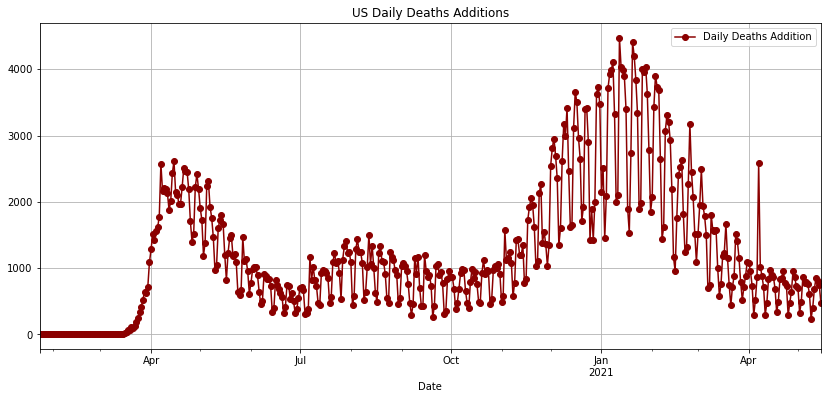

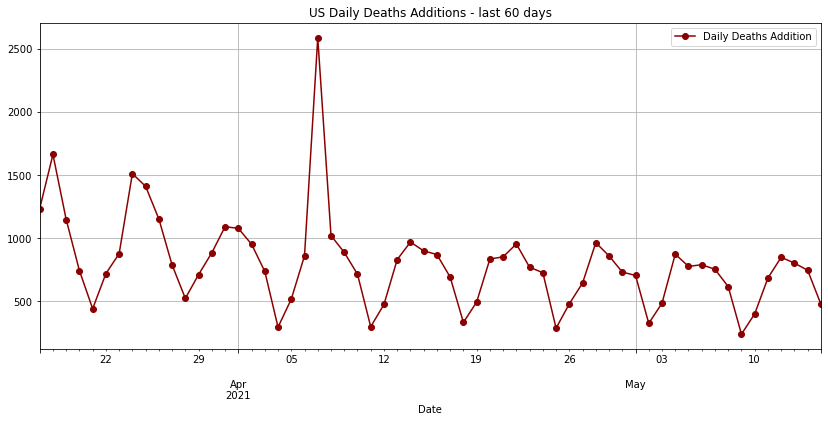

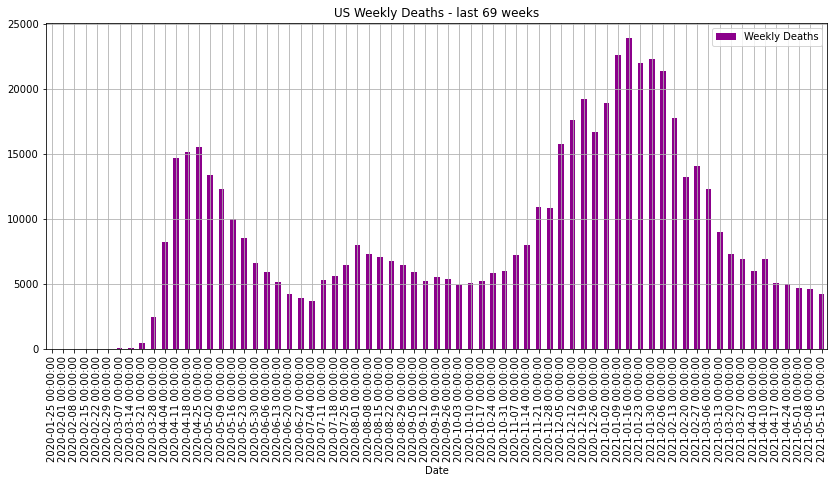

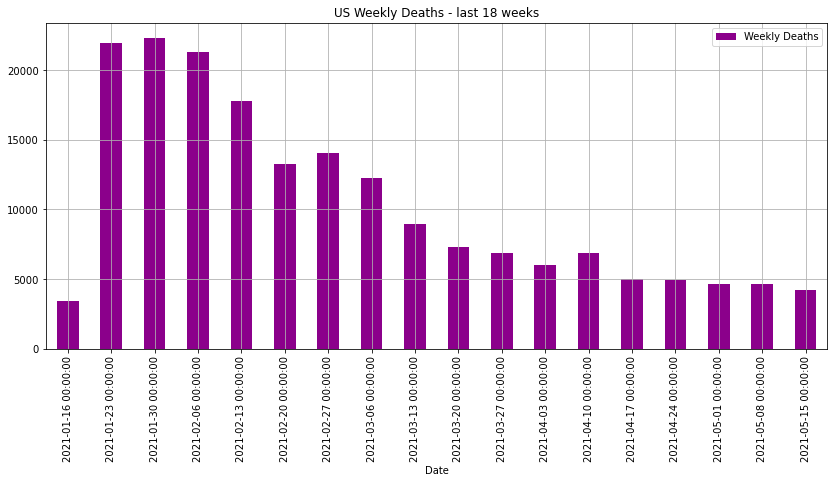

New Cases Per Day
            Daily Cases Addition
Date                            
2021-05-08               34493.0
2021-05-09               21392.0
2021-05-10               36898.0
2021-05-11               33651.0
2021-05-12               35878.0
2021-05-13               38087.0
2021-05-14               42298.0
2021-05-15               28813.0


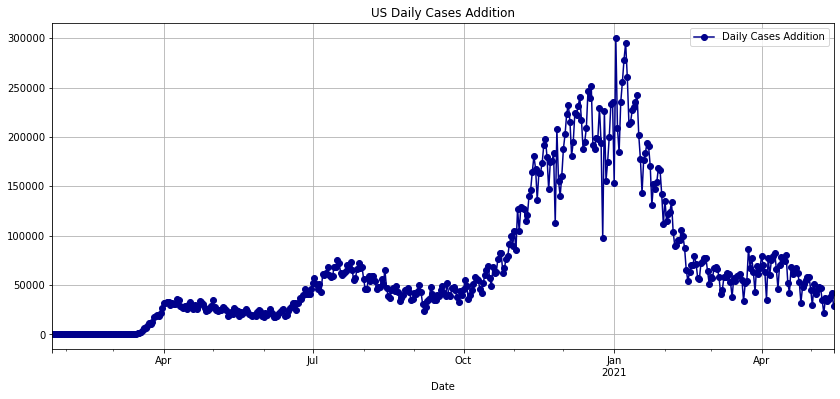

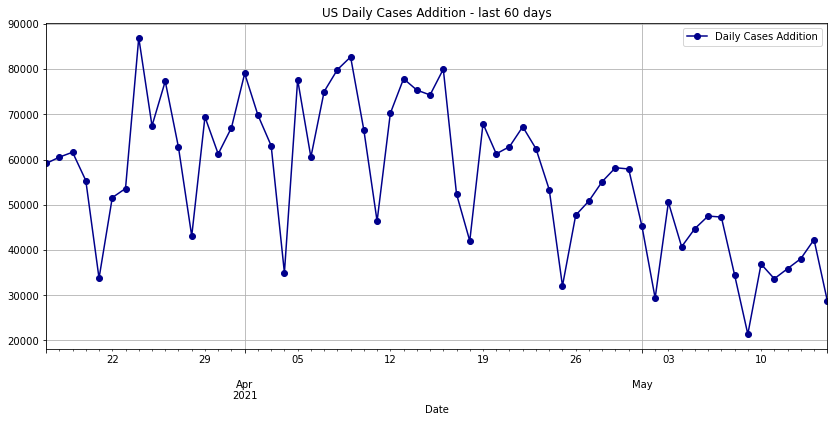

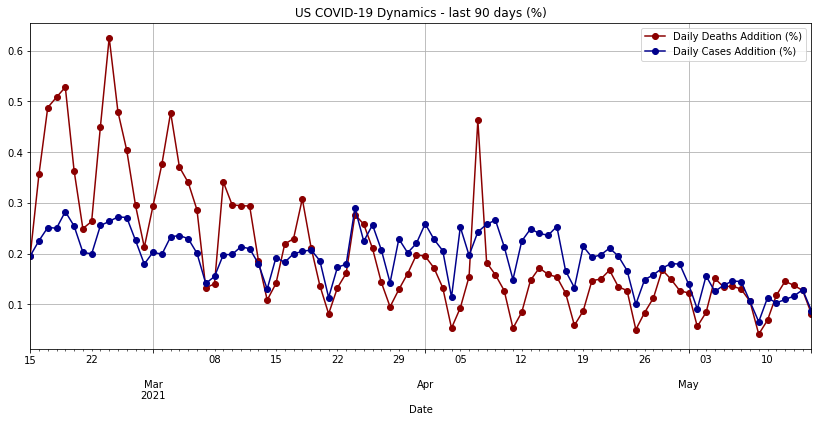

In [1]:
import covid_19_shared
covid_19_shared.Country_COVID19_Stats("US").show()

In [2]:
df = covid_19_shared.get_all_states_stats()

Getting population...
Getting list of states...
Getting USA data...
State                         Population          New Conf. Conf./Popul.(%)     New Death Death/Popul.(%) 
Alabama                       4779736             2016      11.294117           14        0.230933        
Alaska                        710231              0         9.780480            0         0.049702        
Arizona                       6392017             474       13.649776           12        0.273138        
Arkansas                      2915918             202       11.615107           3         0.198668        
California                    37253956            1035      10.114596           23        0.168186        
Colorado                      5029196             972       10.559740           10        0.128092        
Connecticut                   3574097             0         9.652144            0         0.228673        
Delaware                      897934              158       11.902100       

In [3]:
import pandas as pd
df["PopulShare"] =df.Population * 100 / df.Population.sum()

df["Confirmed"] = pd.Series(index=df.index, data=[(v.cv_data_.Confirmed[-1]) for v in df["Statistics"]])
df["OneDayConf"] = pd.Series(index=df.index
                             , data=[v.cv_data_.Confirmed[-1] - v.cv_data_.Confirmed[-2] 
                                     for v in df["Statistics"]])
df["OneWeekConfirmed"] = pd.Series(index=df.index, data=[(v.cv_data_.Confirmed[-1] - v.cv_data_.Confirmed[-8]) for v in df["Statistics"]])

df["ConfShare"] = df.Confirmed * 100 / df.Confirmed.sum()
df["NewConfShare"] = df.OneWeekConfirmed * 100 / df.OneWeekConfirmed.sum()  # using one week stats

df["Deaths"] = pd.Series(index=df.index, data=[(v.cv_data_.Dead[-1]) for v in df["Statistics"]])
df["OneDayDeaths"] = pd.Series(index=df.index, data=[v.cv_data_.Dead[-1] - v.cv_data_.Dead[-2] for v in df["Statistics"]])
df["OneWeekDeaths"] = pd.Series(index=df.index, data=[v.cv_data_.Dead[-1] - v.cv_data_.Dead[-8] for v in df["Statistics"]])

df["DeathsShare"] = df.Deaths * 100 / df.Deaths.sum()
df["NewDeathsShare"] = df.OneWeekDeaths * 100 / df.OneWeekDeaths.sum()
df["LastDayDeathsShare"] = df.OneDayDeaths * 100 / df.OneDayDeaths.sum()

# Indicator of intensity
# "Density" as ratio of value share to population share
df["CasesDensity"] = df.ConfShare / df.PopulShare
df["NewCasesDensity"] = df.NewConfShare / df.PopulShare

df["DeathsDensity"] = df.DeathsShare / df.PopulShare
df["NewDeathsDensity"] = df.NewDeathsShare / df.PopulShare


In [4]:
# df3 = df.copy()
# del df3["Statistics"]
df3 = df[[
          "OneWeekDeaths"
          , "OneDayDeaths"
          
          , "CasesDensity"
          , "NewCasesDensity"
          
          , "DeathsDensity"
          , "NewDeathsDensity"

          , "NewDeathsShare"
          , "LastDayDeathsShare"
         ]]
# dropping statistics column 
# df4 = df3.sort_values("NewDeathsShare", ascending=False)
df4 = df3.sort_values("NewDeathsDensity", ascending=False)
# df4 = df3.sort_values("DeathsDensity", ascending=False)
# df4 = df3.sort_values("OneDayDeaths", ascending=False)
# df4 = df3.sort_values("OneWeekDeaths", ascending=False)
# df4 = df3.sort_values("DeathsDensity", ascending=False)
df4

,OneWeekDeaths,OneDayDeaths,CasesDensity,NewCasesDensity,DeathsDensity,NewDeathsDensity,NewDeathsShare,LastDayDeathsShare
State,,,,,,,,
Michigan,413,112,0.937855,1.919446,1.068527,3.115485,9.854450,23.529412
Florida,356,56,1.156135,1.609834,1.023401,1.411739,8.494393,11.764706
Nebraska,34,0,1.155787,0.713540,0.667961,1.388000,0.811262,0.000000
New Jersey,161,20,1.091193,0.440321,1.575234,1.365325,3.841565,4.201681
Pennsylvania,228,19,0.886409,1.343981,1.122220,1.338266,5.440229,3.991597
Illinois,224,45,1.009975,1.212429,1.030231,1.301645,5.344786,9.453782
Colorado,87,10,1.002548,2.278581,0.683563,1.289773,2.075877,2.100840
Puerto Rico,63,4,0.348224,0.489961,0.348769,1.260709,1.503221,0.840336
West Virginia,31,1,0.810712,1.586643,0.793998,1.247327,0.739680,0.210084
